In [20]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct

In [21]:
gs_csv = "gs_outputs/gs_authorlist_publications_notitles.csv"
scival_csv = "scival_outputs/scival_authorlist_publications_withdoccounts.csv"

In [22]:
gs_df = pd.read_csv(gs_csv)
scival_df = pd.read_csv(scival_csv)

In [23]:
print(gs_df.head)
print(scival_df.head)

<bound method NDFrame.head of                             Name    Scholar ID  Document Count  Cited by  \
0                  Tim H. Murphy  qJjM8hkAAAAJ             239     21139   
1            Annie Vogel Ciernia  XAGfOIIAAAAJ              44      1964   
2                 Brian MacVicar  Sx3420cAAAAJ             217     22082   
3           Fidel Vila-Rodriguez  VynxFpEAAAAJ             263      5626   
4                  Shernaz Bamji  C832lNEAAAAJ              59      5306   
5                      Lara Boyd  yutn3mwAAAAJ             356     15074   
6                  Paul Pavlidis  ataejQQAAAAJ             245     17627   
7              Martin J. McKeown  cBAT2tQAAAAJ             369     16443   
8   A Jon Stoessl OR jon Stoessl  KnhWIqwAAAAJ             449     30713   
9                  Peter Cripton  hm6fJTkAAAAJ             284      7678   
10               Jason S. Snyder  B6Fe4-4AAAAJ              39      6034   
11              Wolfram Tetzlaff  HgUvr-IAAAAJ            

In [24]:
def get_coauthor_matrix(df):
    names = df.loc[:,"Name"]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author["Name"]
        row = names[names == auth_name].index[0]
        try:
            coauthors = ast.literal_eval(author["Coauthors"]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor]
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [25]:
scival_coauthor_matrix = get_coauthor_matrix(scival_df)
gs_coauthor_matrix = get_coauthor_matrix(gs_df)     



 Brian Fisher has no coauthors
 Mark S. Cembrowski has no coauthors
 Annie Vogel Ciernia has no coauthors
 Michael D. Gordon has no coauthors
 Manu S. Madhav has no coauthors
 Emily Lauren Sylwestrak has no coauthors
 Catharine A. Winstanley has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [26]:
print(scival_coauthor_matrix)
print(gs_coauthor_matrix)

print(type(scival_coauthor_matrix))
print(scival_coauthor_matrix.shape)

scival_2dlist = scival_coauthor_matrix.tolist()
print(type(scival_2dlist))

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 5. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 3. ... 0. 9. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [3. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
(41, 41)
<class 'list'>


In [27]:
print(np.size(scival_2dlist))
ci, _ = bct.modularity_und(scival_2dlist)
# gp, gn = bct.gateway_coef_sign(scival_coauthor_matrix, ci)

# gpb, gnb = bct.gateway_coef_sign(scival_coauthor_matrix, ci, centrality_type = "betweenness")

1681


In [28]:
scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))

[' Z. Jane Wang', ' Fidel Vila-Rodriguez', ' Sophia Frangou', ' Ian Mackenzie', ' Martin McKeown', ' Lara A. Boyd', ' Liisa A. M. Galea', ' Leonid Sigal', ' P. A. Cripton', ' Fabio Rossi', ' Helge Rhodin', ' Terrance P. Snutch', ' YuTian Wang', ' A. Jon Stoessl', ' Todd Stephen Woodward', ' Andy Y. Shih', ' Wolfram G. Tetzlaff', ' Paul Pavlidis', ' Timothy H. Murphy', ' Catharine Rankin', ' Peyman Servati', ' Brian A. MacVicar', ' Lynn A. Raymond', ' Eric T. Shea-Brown', ' Silke Appel-Cresswell', ' Anthony G. Phillips', ' Jason S. Snyder', ' Adrienne L. Fairhall', ' Brian Fisher', ' Leigh Anne Swayne', ' Mark S. Cembrowski', ' Annie Vogel Ciernia', ' Kurt Haas', ' Craig E. Brown', ' Michael D. Gordon', ' Shernaz X. Bamji', ' Jeremy Keith Seamans', ' Manu S. Madhav', ' Emily Lauren Sylwestrak', ' Catharine A. Winstanley', ' Angela Jane I. Roskams']


([<matplotlib.axis.XTick at 0x1c8035666e0>,
 [Text(0, 0, ' Z. Jane Wang'),
  Text(1, 0, ' Fidel Vila-Rodriguez'),
  Text(2, 0, ' Sophia Frangou'),
  Text(3, 0, ' Ian Mackenzie'),
  Text(4, 0, ' Martin McKeown'),
  Text(5, 0, ' Lara A. Boyd'),
  Text(6, 0, ' Liisa A. M. Galea'),
  Text(7, 0, ' Leonid Sigal'),
  Text(8, 0, ' P. A. Cripton'),
  Text(9, 0, ' Fabio Rossi'),
  Text(10, 0, ' Helge Rhodin'),
  Text(11, 0, ' Terrance P. Snutch'),
  Text(12, 0, ' YuTian Wang'),
  Text(13, 0, ' A. Jon Stoessl'),
  Text(14, 0, ' Todd Stephen Woodward'),
  Text(15, 0, ' Andy Y. Shih'),
  Text(16, 0, ' Wolfram G. Tetzlaff'),
  Text(17, 0, ' Paul Pavlidis'),
  Text(18, 0, ' Timothy H. Murphy'),
  Text(19, 0, ' Catharine Rankin'),
  Text(20, 0, ' Peyman Servati'),
  Text(21, 0, ' Brian A. MacVicar'),
  Text(22, 0, ' Lynn A. Raymond'),
  Text(23, 0, ' Eric T. Shea-Brown'),
  Text(24, 0, ' Silke Appel-Cresswell'),
  Text(25, 0, ' Anthony G. Phillips'),
  Text(26, 0, ' Jason S. Snyder'),
  Text(27, 0, ' 

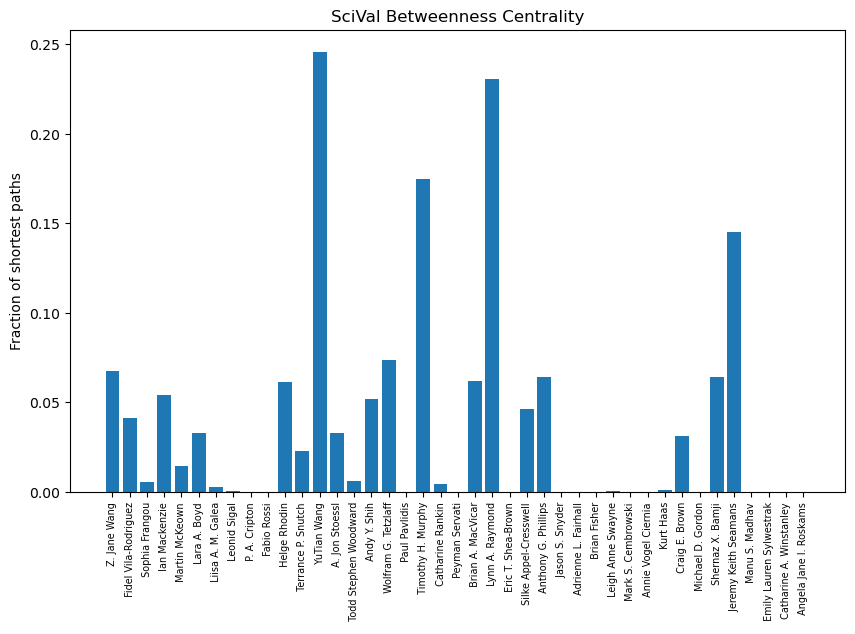

In [29]:
plt.figure(figsize=(10,6))
names = scival_df["Name"].to_list()
print(names)
plt.bar(names, scival_centrality_normed)
plt.title("SciVal Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(41), labels=names, rotation=90, fontsize='x-small')

In [30]:
gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
gs_centrality_normed = gs_centrality/((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))

scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))

In [31]:
centrality_df = pd.DataFrame({
    "Name":names,
    "SciVal":scival_centrality_normed,
    "Google Scholar":gs_centrality_normed,
})

ordered_df = centrality_df.sort_values(by="Google Scholar", ascending=True)

In [32]:
print(ordered_df.head)

<bound method NDFrame.head of                         Name    SciVal  Google Scholar
38   Emily Lauren Sylwestrak  0.000000        0.000000
36      Jeremy Keith Seamans  0.145230        0.000000
33            Craig E. Brown  0.031209        0.000000
32                 Kurt Haas  0.001282        0.000000
27      Adrienne L. Fairhall  0.000000        0.000000
25       Anthony G. Phillips  0.064122        0.000000
10              Helge Rhodin  0.061418        0.000000
24     Silke Appel-Cresswell  0.046522        0.000000
22           Lynn A. Raymond  0.230510        0.000000
20            Peyman Servati  0.000000        0.000641
1       Fidel Vila-Rodriguez  0.041012        0.001122
21         Brian A. MacVicar  0.061965        0.003149
19          Catharine Rankin  0.004227        0.003205
34         Michael D. Gordon  0.000000        0.004969
28              Brian Fisher  0.000000        0.010240
40    Angela Jane I. Roskams  0.000000        0.016483
37            Manu S. Madhav  0.000

([<matplotlib.axis.XTick at 0x1c803f32260>,
 [Text(0, 0, ' Z. Jane Wang'),
  Text(1, 0, ' Fidel Vila-Rodriguez'),
  Text(2, 0, ' Sophia Frangou'),
  Text(3, 0, ' Ian Mackenzie'),
  Text(4, 0, ' Martin McKeown'),
  Text(5, 0, ' Lara A. Boyd'),
  Text(6, 0, ' Liisa A. M. Galea'),
  Text(7, 0, ' Leonid Sigal'),
  Text(8, 0, ' P. A. Cripton'),
  Text(9, 0, ' Fabio Rossi'),
  Text(10, 0, ' Helge Rhodin'),
  Text(11, 0, ' Terrance P. Snutch'),
  Text(12, 0, ' YuTian Wang'),
  Text(13, 0, ' A. Jon Stoessl'),
  Text(14, 0, ' Todd Stephen Woodward'),
  Text(15, 0, ' Andy Y. Shih'),
  Text(16, 0, ' Wolfram G. Tetzlaff'),
  Text(17, 0, ' Paul Pavlidis'),
  Text(18, 0, ' Timothy H. Murphy'),
  Text(19, 0, ' Catharine Rankin'),
  Text(20, 0, ' Peyman Servati'),
  Text(21, 0, ' Brian A. MacVicar'),
  Text(22, 0, ' Lynn A. Raymond'),
  Text(23, 0, ' Eric T. Shea-Brown'),
  Text(24, 0, ' Silke Appel-Cresswell'),
  Text(25, 0, ' Anthony G. Phillips'),
  Text(26, 0, ' Jason S. Snyder'),
  Text(27, 0, ' 

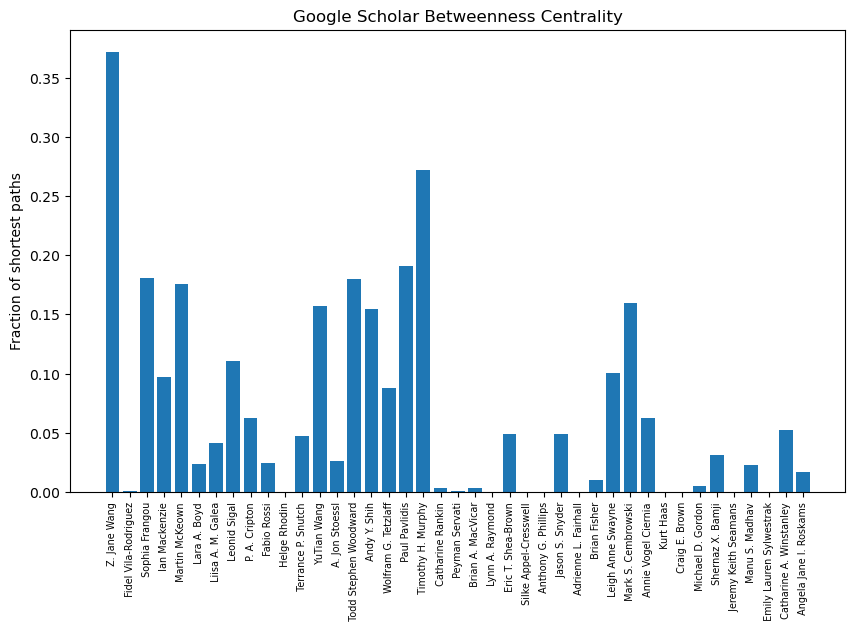

In [34]:
plt.figure(figsize=(10,6))
gs_names = gs_df["Name"].to_list()
plt.bar(names, gs_centrality_normed)
plt.title("Google Scholar Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(41), labels=names, rotation=90, fontsize='x-small')

[0.06777361 0.04101162 0.00560096 0.05392513 0.01459405 0.03279923
 0.00262664 0.00064103 0.         0.         0.06141821 0.02285473
 0.24572721 0.03292531 0.00632792 0.05192308 0.07371795 0.
 0.17500687 0.00422661 0.         0.06196464 0.23050963 0.
 0.0465216  0.06412167 0.         0.         0.         0.00037243
 0.         0.         0.00128205 0.03120937 0.         0.06442103
 0.14523029 0.         0.         0.         0.        ]
[0.37193611 0.00112179 0.18080653 0.09686716 0.17566863 0.02363515
 0.04129926 0.11103797 0.062802   0.02444516 0.         0.04736497
 0.15707776 0.02642844 0.17969921 0.15481393 0.08812085 0.19125231
 0.27179058 0.00320513 0.00064103 0.00314946 0.         0.04890186
 0.         0.         0.04877244 0.         0.01023951 0.10066136
 0.15987659 0.06287958 0.         0.         0.00496933 0.03141277
 0.         0.02307692 0.         0.05192308 0.0164829 ]


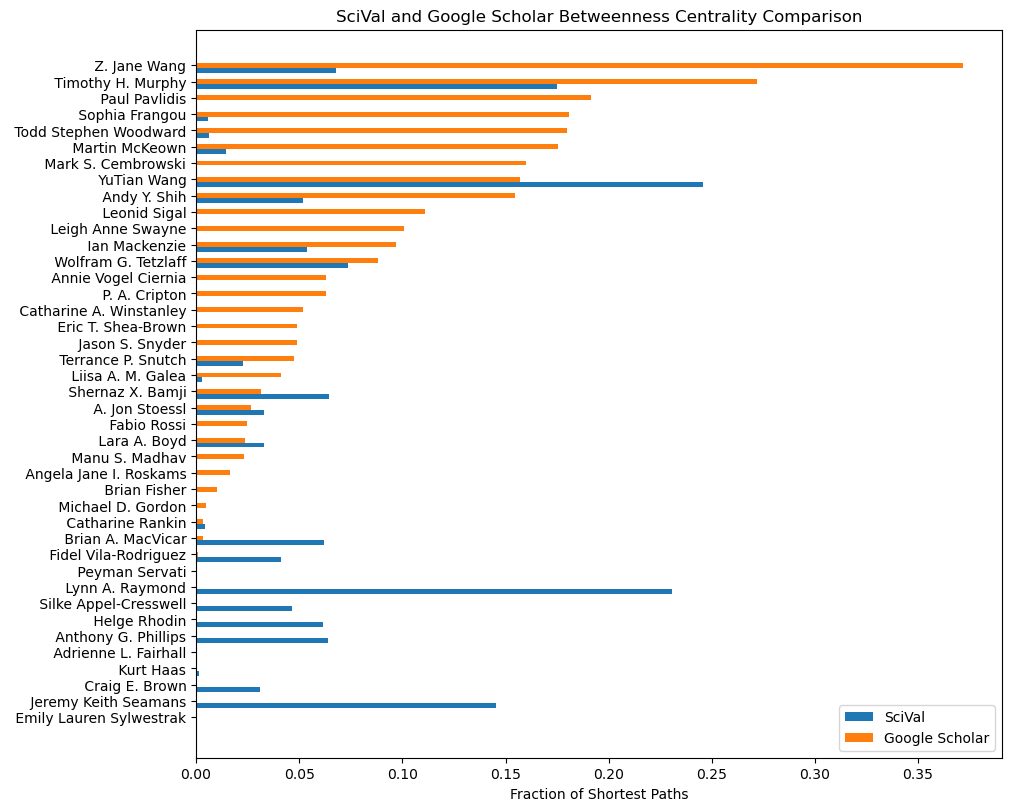

In [35]:
species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

print(scival_centrality_normed)
print(gs_centrality_normed)

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths")
ax.set_title('SciVal and Google Scholar Betweenness Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

In [11]:
print(gpb)

[0.68310732 0.         0.53478476 0.46037174 0.42189096 0.4994976
 0.02613166 0.22309074 0.38259225 0.24503697 0.00222169 0.84603706
 0.3572346  0.6677297  0.01479088 0.09863598 0.34358359 0.6679623
 0.3139091  0.02252441 0.         0.         0.         0.02978438
 0.         0.00356593 0.35896325 0.00865188 0.00465214 0.00665767
 0.26932521 0.46625213 0.         0.         0.5        0.07845918
 0.00309382 0.00277673 0.         0.08394077 0.02262906]
41


['Timothy H. Murphy', 'Annie Vogel-Ciernia', 'Brian Archibald MacVicar', 'Fidel Vila-Rodriguez', 'Shernaz X. Bamji', 'Lara A. Boyd', 'Paul Pavlidis', 'Martin J. McKeown', 'A. Jon Stoessl', 'P. A. Cripton', 'Jason S. Snyder', 'Wolfram G. Tetzlaff', 'Anthony G. Phillips', 'Catharine A. Winstanley', 'Yutian Wang', 'Jeremy Keith Seamans', 'Terrance P. Snutch', 'Ian R. Mackenzie', 'Lynn A. Raymond', 'Kurt Z. Haas', 'Mark S. Cembrowski', 'Fabio M.V. Rossi', 'Angela Jane I. Roskams', 'Catharine H. Rankin', 'Michael J. Gordon', 'Leonid Sigal', 'Z. Jane Wang', 'Peyman Servati', 'Liisa A.M. Galea', 'Sophia Frangou', 'Silke Appel-Cresswell', 'Helge Rhodin', 'Manu S. Madhav', 'Brian D. Fisher', 'Leigh Anne Swayne', 'Craig E. Brown', 'Adrienne L. Fairhall', 'Eric T. Shea-Brown', 'Emily Lauren Sylwestrak', 'Andy Y. Shih', 'Todd Stephen Woodward']


([<matplotlib.axis.XTick at 0x26fb13df3d0>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel-Ciernia'),
  Text(2, 0, 'Brian Archibald MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin J. McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'Yutian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian R. Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Z. Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio M.V. Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine H. Rankin'),
  Text(24, 0, 'Michael J. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Te

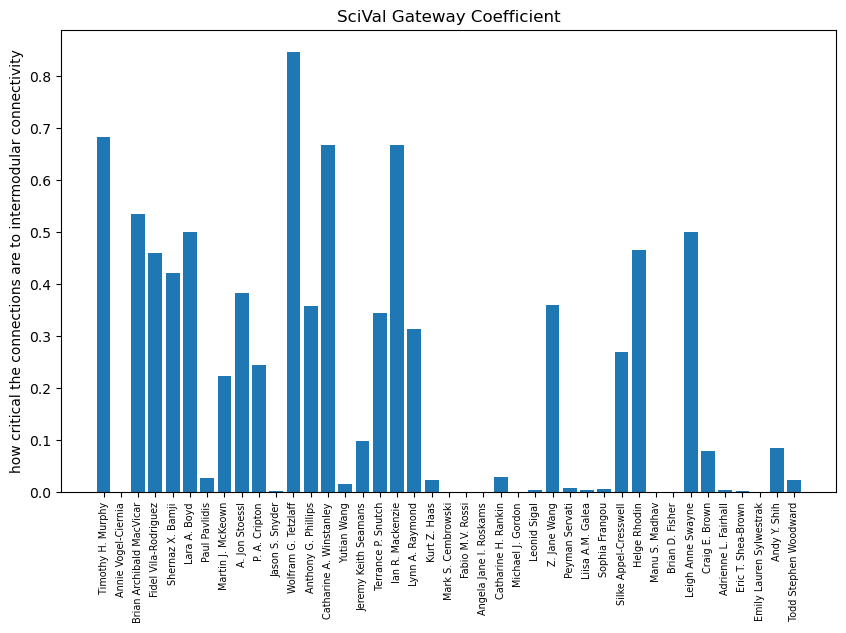

In [52]:
plt.figure(figsize=(10,6))
names = scival_df["Name"].to_list()
print(names)
plt.bar(names, gpb)
plt.title("SciVal Gateway Coefficient")
plt.ylabel("how critical the connections are to intermodular connectivity")
plt.xticks(range(41), labels=names, rotation=90, fontsize='x-small')